<a href="https://colab.research.google.com/github/JatinShokeen/cs666student/blob/main/Copy_of_CS666_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

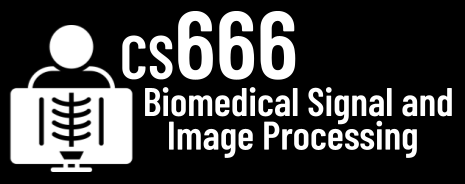
# Assignment 7

In [ ]:
# NAME:

JATIN SHOKEEN

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a data repository from the National Cancer Institute.

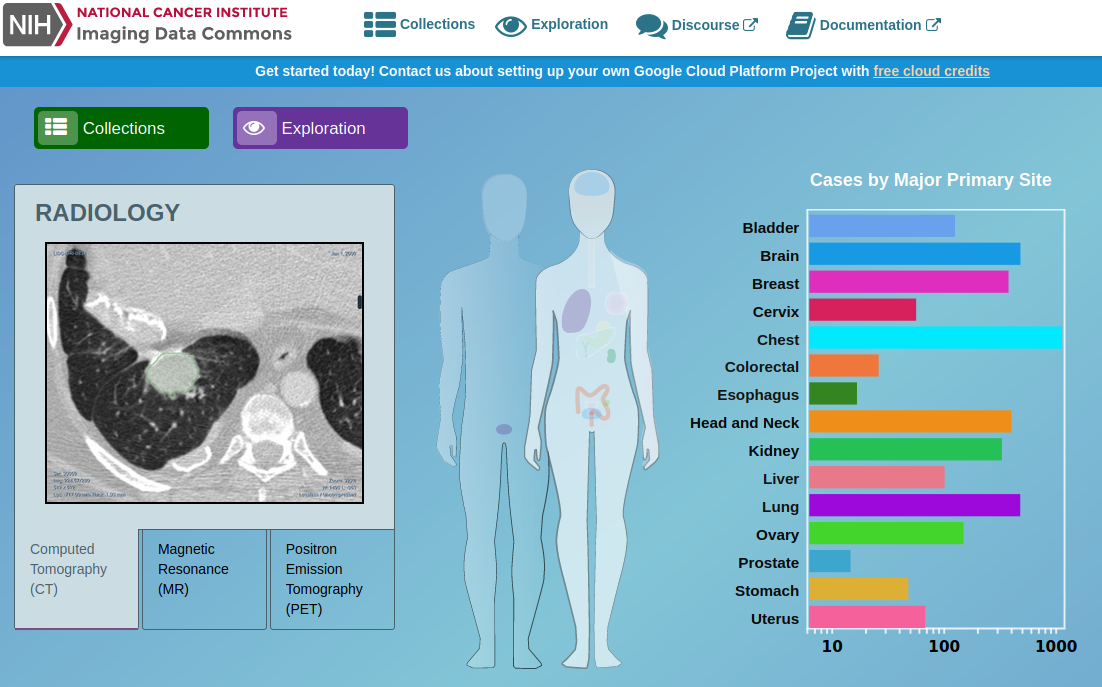

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [10 Points]

In [9]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [10]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
#

In [11]:
#
# TODO: REPLACE WITH DIRECT URL TO YOUR SELECTED CASE

https://viewer.imaging.datacommons.cancer.gov/viewer/1.3.6.1.4.1.14519.5.2.1.5168.1900.312508428193476302553228969583


In [12]:
# 3) Paste a screenshot of the viewer after the data was loaded below.

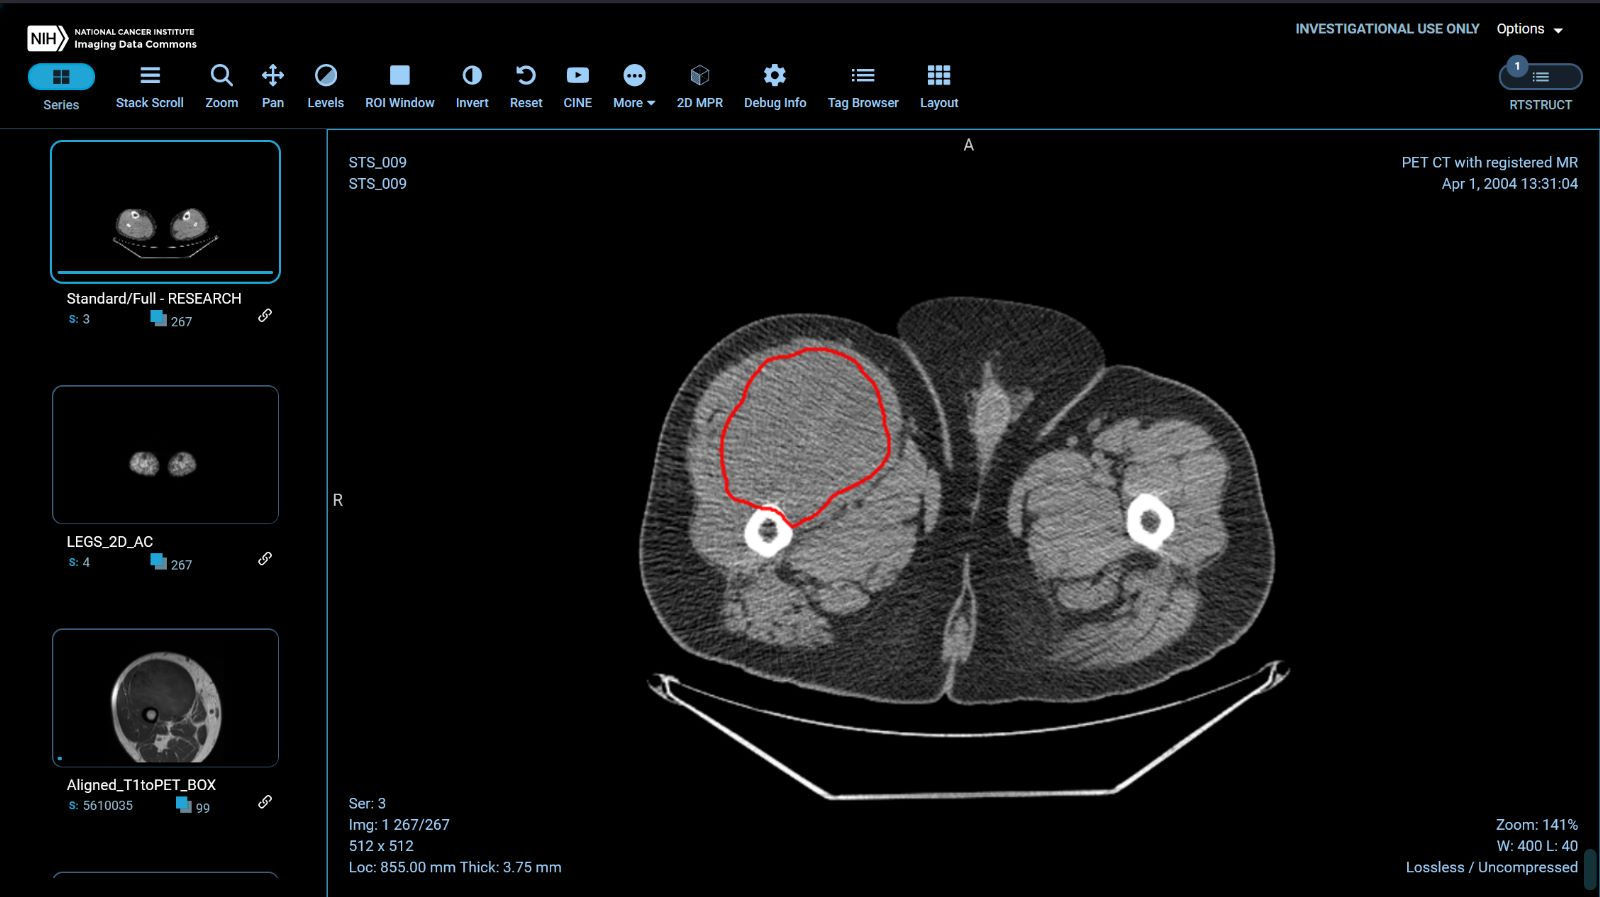TODO: Add screenshot of the viewer.

**Task 2**: Visualize structural and PET side-by-side! [20 Points]

In [13]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [14]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [15]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [16]:
# TODO: Paste a screenshot showing the 2-column layout below.

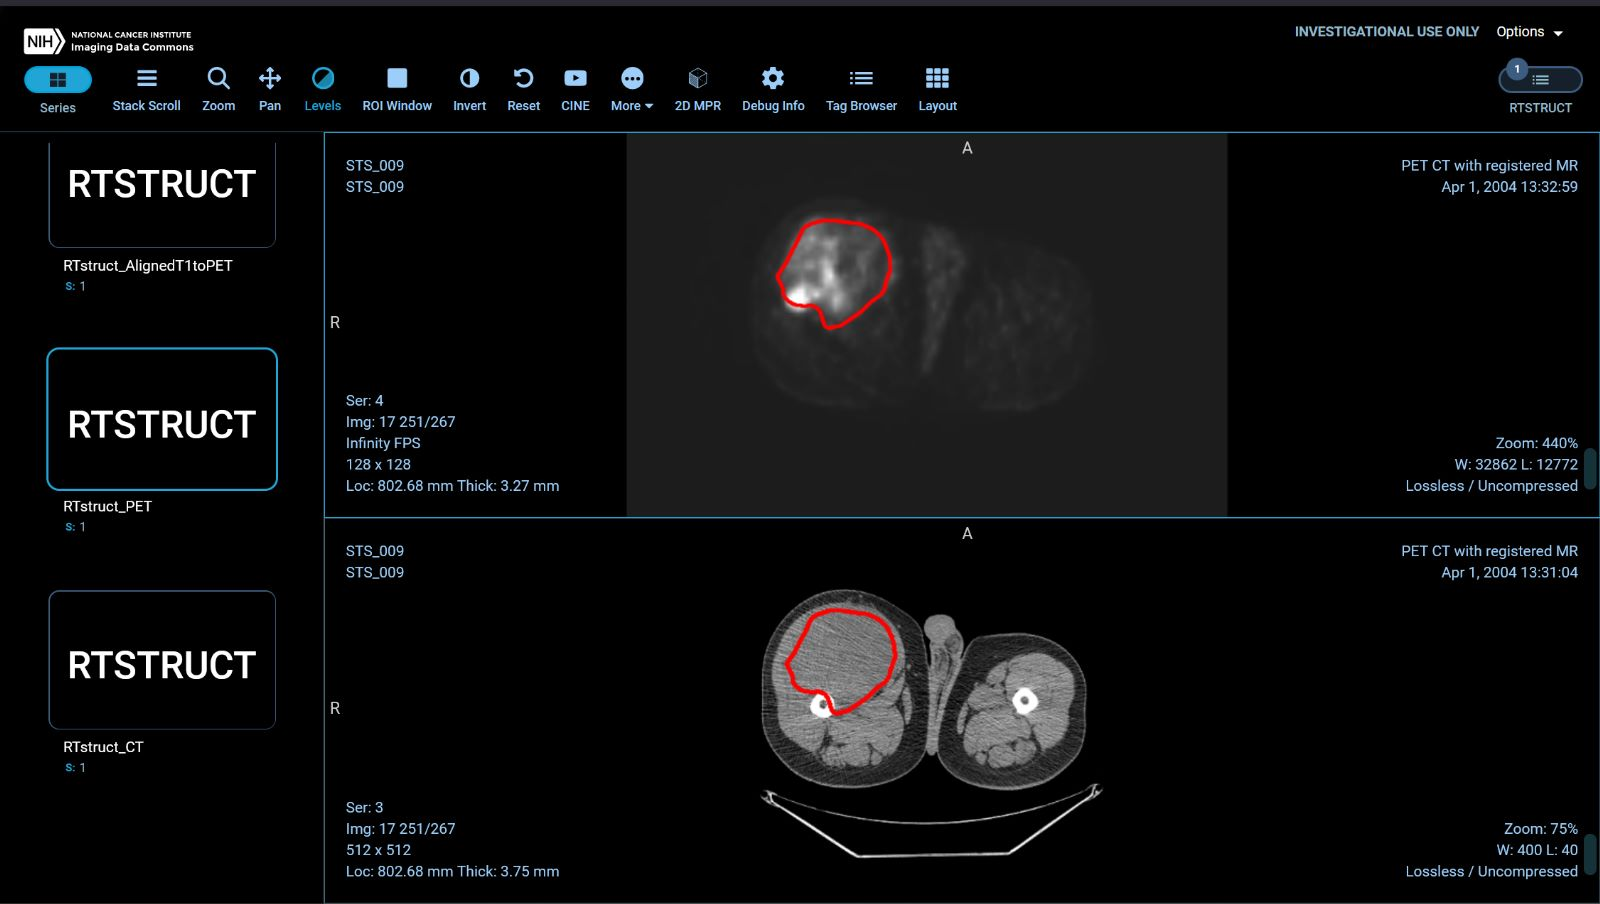TODO: Add your screenshot showing the cancerous lesion and structural scan side-by-side.

**Task 3**: Let's access the pixel data! [20 Points]

In [17]:
#
# IMPORTANT: SWITCH BACK TO THE STANDARD LAYOUT (1-column) or RELOAD THE PAGE.
#
# AND: Visualize the CT/MRI scan rather than the PET scan for this task.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [8]:
# 1) Open the Developer Tools of your browser and access the JS console.

In [6]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
#   element = cornerstone.getEnabledElements()[0];
#   pixels = element.image.getPixelData();
#

In [7]:
# 3): What is the minimum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [26]:
#
#
# TODO: YOUR CODE GOES HERE
const minValue = Math.min(...pixels);
console.log(minValue);

#
#

NameError: ignored

In [27]:
# TODO: MINIMUM VALUE OF THE SLICE

After the successfull compilation of the code the minimum value of slice comes out to be 24

**Task 4**: Let's apply a 3x3 filter mask! [30 Points]

In [23]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Sobel, Gaussian blur, edge detection..).
#
# After setting new pixel values, you can re-draw/re-render the current slice with this command:
#
#   cornerstone.renderGrayscaleImage(element, true);
#

In [24]:
#
#
# TODO: YOUR CODE GOES HERE


element  = cornerstone.getEnabledElements()[0];
pixels = element.image.getPixelData();

temp_pixels = Array.from(pixels);
w = element.image.width;
h = element.image.height;

var pixels_reshape = [];
while(temp_pixels.length) pixels_reshape.push(temp_pixels.splice(0,w));

var temp_new_pixels = new Array(h);
for (i = 0; i < temp_new_pixels; i++){
    temp_new_pixels[i] = new Array(w);
    temp_new_pixels[i].fill(0)
}

for (var i = 1; i < h-1; i++) {
   for (var j = 1; j < w-1; j++) {
     var UpperLeft = pixels_reshape[i-1][j-1];
     var UpperMiddle = pixels_reshape[i-1][j];
     var UpperRight = pixels_reshape[i-1][j+1];
     var CenterLeft = pixels_reshape[i][j-1];
     var CenterMiddle = pixels_reshape[i][j];
     var CenterRight = pixels_reshape[i][j+1];
     var LowerLeft = pixels_reshape[i+1][j-1];
     var LowerMiddle = pixels_reshape[i+1][j];
     var LowerRight = pixels_reshape[i+1][j+1];
     var valx = UpperLeft + CenterLeft*2 + LowerLeft - UpperRight - CenterRight*2 - LowerRight;
     var valy = UpperLeft + UpperMiddle*2 + UpperRight - LowerLeft - LowerMiddle*2 - LowerRight;
     temp_new_pixels[i][j]=Math.abs(valx)+Math.abs(valy);
   }
 }

 var new_pixels = Array.prototype.concat.apply([], temp_new_pixels);
 pixels.set(new_pixels);
 cornerstone.renderGrayscaleImage(element, true)
#
#

SyntaxError: ignored

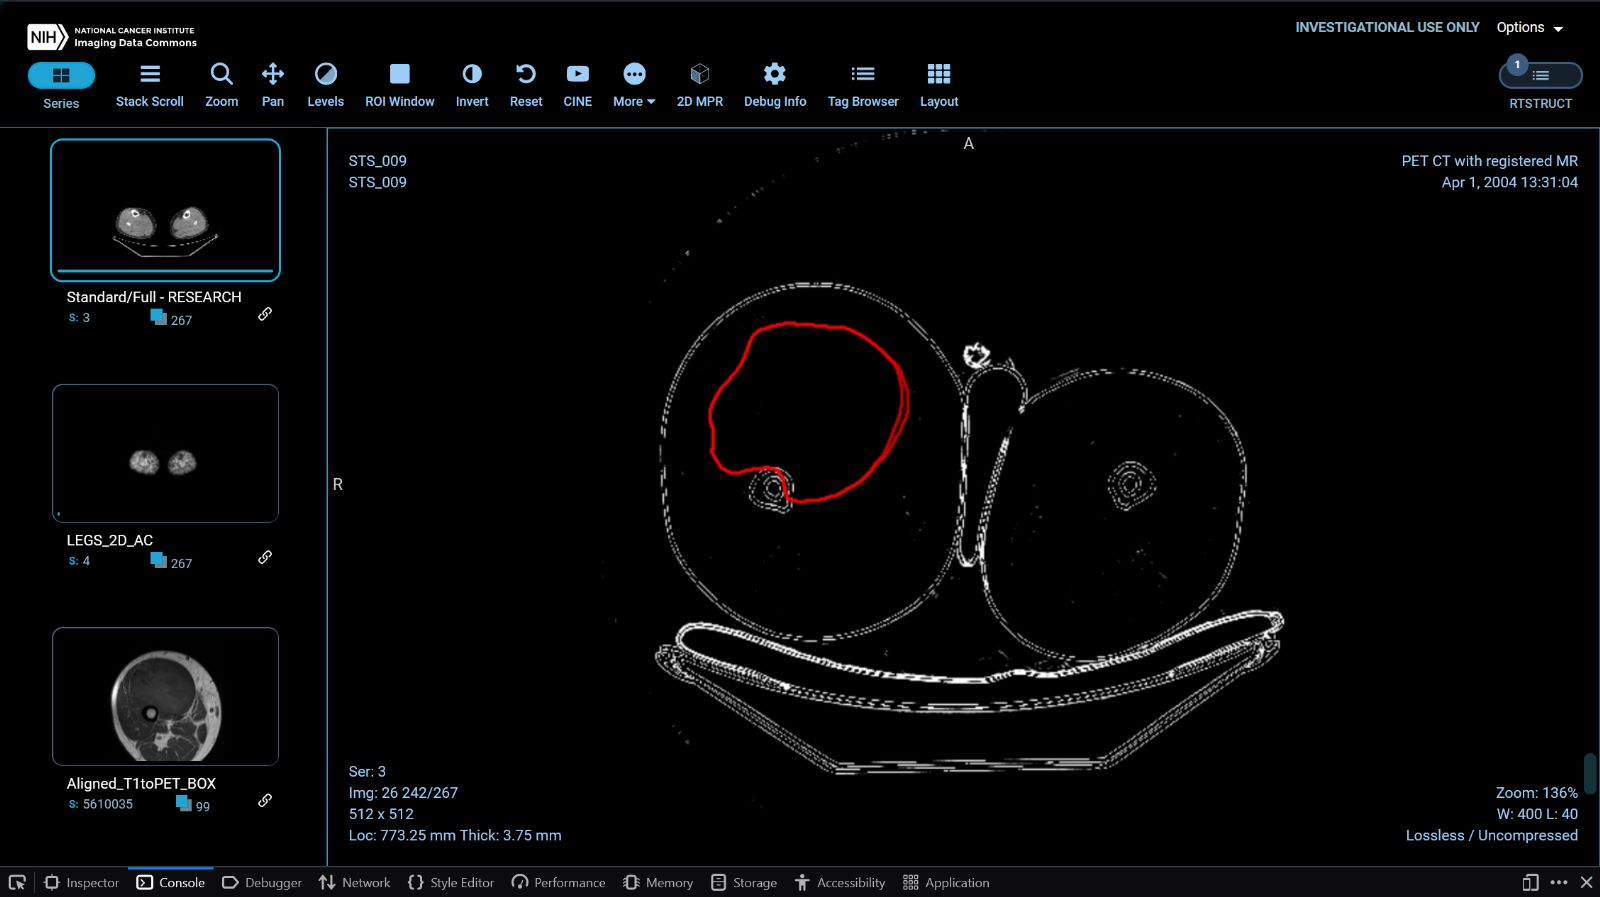TODO: Add Screenshot of the filtered slice.

**Task 5**: Use the Segment Anything model to annotate the scan. [20 Points]

In [ ]:
#
# Now we will use the bookmarklet to run Meta's Segment Anything model on the data.
#
# 1) Visit https://cs666.org/sam/ and install the bookmarklet.
#
# 2) Run the model on a structure of your choice.
#    HINT: The video shows how to do it https://www.youtube.com/watch?v=2kxrqQfjsQw
#
# 3) Take a screenshot of the result.
#

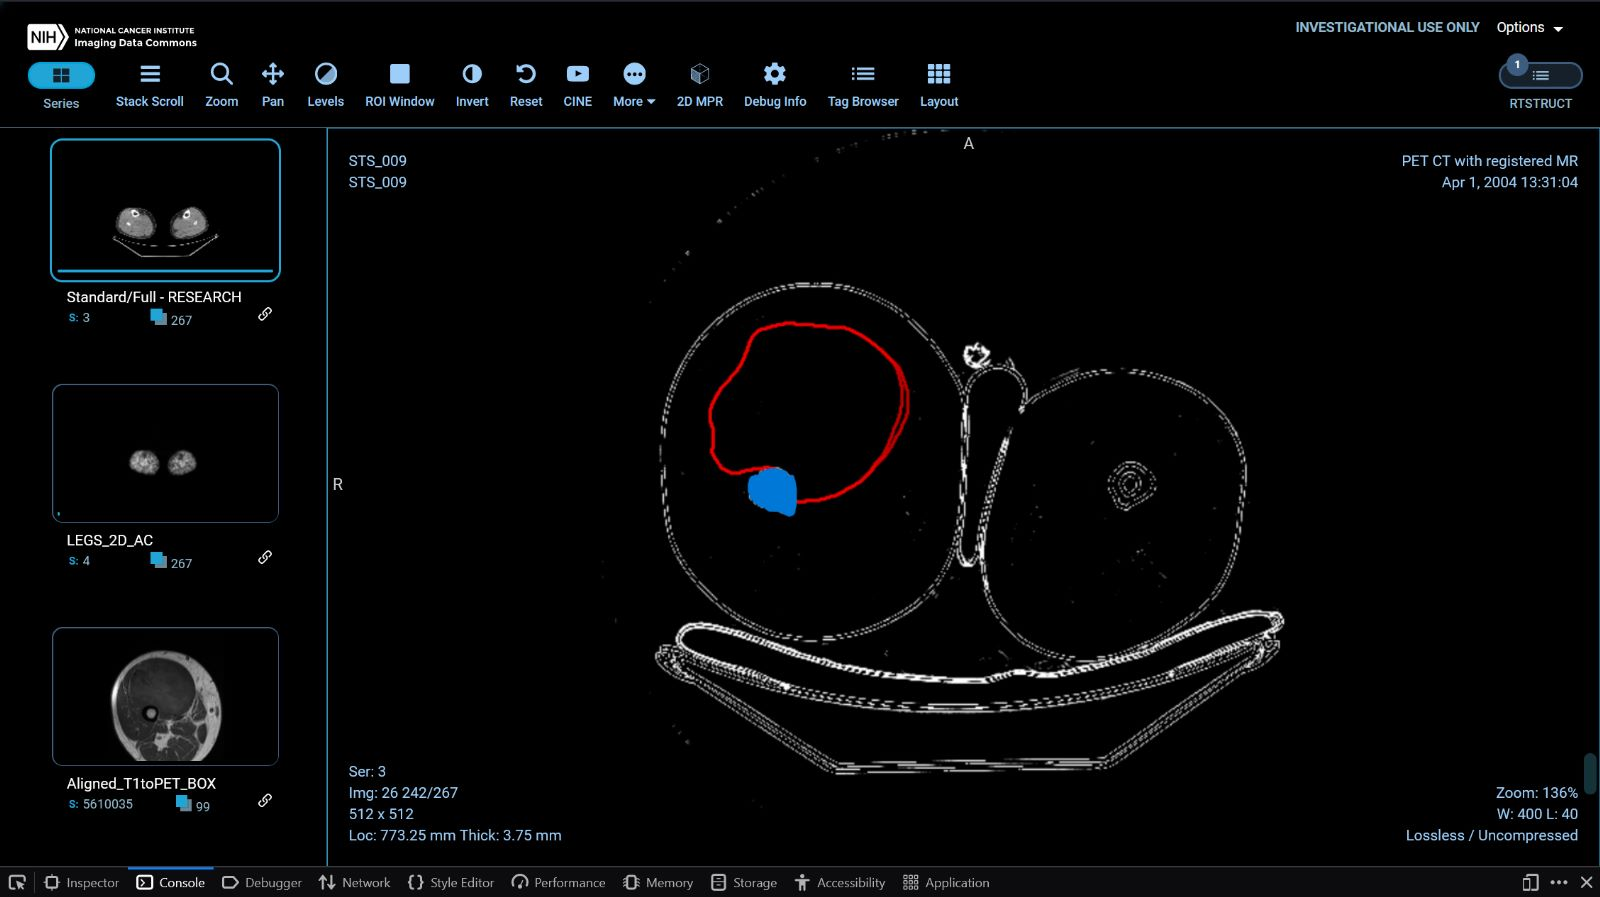TODO: Add Screenshot of the segmented slice.

In [ ]:
#
# 4) Now, please study the code of the bookmarklet.
#    See https://gist.github.com/haehn/bbec8cf8442adea5bb10c08d9c3cc13f
#
#    TODO: What is the main difference between processing with the bookmarklet
#          versus the kernel mask filtering from above in terms of accessing
#          the pixels?
#


Talking about the difference between the processing with the boormarklet and the krnel mask filtering, I would say that the kernel mask filtering is accessing the required pixels from an image with the help of functions or the specific image processing libraries, whereas on the other hand bookmarklet has the dorect access to the pixels straight from the canvas with the help of getImageData() method. 

**Bonus 1**: Create a Segment Anything bookmarklet for NiiVue.js-based installations. [33 Points]

In [ ]:
#
# Similar to the code from Task 5, please create a bookmarklet (JS injection) 
# for a NiiVue.js-based visualization such as: https://mpsych.github.io/CACTAS/
#
# HINT: nv.drawSelectionBox([x,y,w,h]) draws a selection box and here is a related
#       github issue: https://github.com/niivue/niivue/issues/596
#
# HINT2: You will want to hide the blue orientation lines before grabbing the
#        canvas pixels.
#          nv.setCrosshairColor([0, 0, 0, 0]);
#          nv.opts.crosshairWidth = 0.;
#          nv.updateGLVolume();
#
# HINT3: The CACTAS repo has a lot of useful NiiVue.js code snippets
#        https://github.com/mpsych/cactas
#

**Bonus 2**: Plugin your NiiVue.js bookmarklet on OpenNeuro.org. [Summer Job]

In [ ]:
#
# Integrate the Segment Anything bookmarklet with OpenNeuro.org, for example here:
# https://openneuro.org/datasets/ds004513/versions/1.0.2/file-display/sub-s033:ses-open:anat:sub-s033_ses-open_T1w.nii.gz
#
# And here is a related Github issue: https://github.com/OpenNeuroOrg/openneuro/issues/2815
#
# STRETCH GOALS TO STRENGTHEN YOUR APPLICATION:
#  1. Run on pixel data rather than canvas imagedata.
#  2. Run in 3D!
#


# was very new to JS so took help in few things from classmate Sumit. Thank you. 

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#